In [351]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as scl
from random import sample as sample

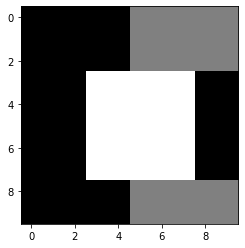

In [339]:
pic = np.zeros((10,10))
pic[3:8,3:8] = 1

pic[0:3,5:] = 0.5
pic[8:,5:] = 0.5
plt.imshow(pic,'gray')

In [380]:
pic = np.array([[0,1,0,1,0,0.7,0,0.7],
               [1,0,1,0,0.7,0,0.7,0],
               [0,1,0,1,0,0.7,0,0.7],
               [1,0,1,0,0.7,0,0.7,0],
               [0,1,0,1,0,0.7,0,0.7],
               [1,0,1,0,0.7,0,0.7,0],
               [0,1,0,1,0,0.7,0,0.7],
               [1,0,1,0,0.7,0,0.7,0]])

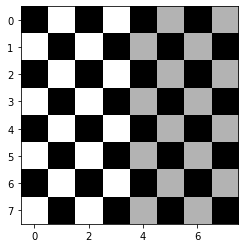

In [381]:
plt.imshow(pic,'gray')
plt.savefig('orig.jpg')

In [382]:
m =  pic.reshape((64,1))

In [383]:
k = 64
L = 64
N = 64

In [384]:
C = np.random.randn(L,k)

In [385]:
h = np.random.randn(N,1)
B = np.random.randn(L,N)
w = np.matmul(B,h)

In [386]:
X = np.matmul(m,h.reshape((1,k)))

In [405]:
def blurred(C, B):
    
    res = np.matmul(scl.circulant(C[:,0]), B)
    
    y = m[0]*res  @ h
    
    for col in range(1,L):
        matr = np.matmul(scl.circulant(C[:,col]), B)
        y += m[col] *matr  @ h
    return y

In [406]:
y_obs = blurred(C,B)

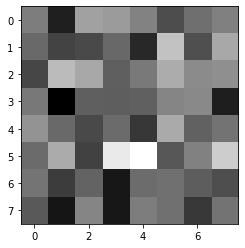

In [407]:
plt.imshow(y_obs.reshape((8,8)),'gray')
plt.savefig('b.jpg')

In [408]:
tau = 500
delta = 0.02
l = 1
eps = 0.01

k_max = 400

In [409]:
ans = np.zeros(64)
norms = np.zeros(64)
for row in range(L):
    print(row)
    if np.linalg.norm(X[row]) == 0:
        ans[row] = 0
    else:
        
        A  = np.matmul(scl.circulant(C[:,row]), B)
        #A  = np.matmul(np.diag(C[:,1]), B)
        #A = B
        #A =  A * mask
        #vec = X[col]

        y = np.matmul(A, X[row])
        #y = A @ X[1]
        #print(vec)
        A_z = np.linalg.inv(A)
        #A_z = A.T

        k0 = tau / np.linalg.norm(A_z @ y)
        Y  = k0 * delta * A_z @ y
        Y = Y.reshape((64,1))
        r = 0

        for j in range(k_max):
        #    print(j)
            s = r + l
            ind = 0
            while True:
                u, sigma, vh = np.linalg.svd(Y)
               # print(u.shape, vh.shape, Y.shape)
                u = u[:,:s]
                #print(u)
                sigma = sigma[:s]
    #print(sigma)
                vh = vh[:s]
                s += l
                ind += 1

                if ((sigma[-1] <= tau) or (ind > 10)):
                    break


            if ind > 10:
                break
            r = np.argmax(sigma)
            Xk = (sigma[0] - tau) * np.matmul(u[:,0].reshape((64,1)), vh[0,:])#.reshape((1,100)))

            for i in range(1,s-l):
                #print(i, s)
                #print(u.shape)
                #u[:,i]
                Xk += (sigma[i] - tau) * np.matmul(u[:,i].reshape((64,1)), vh[i,:])#.reshape((1,100)))
          #  Xk = Xk.reshape((100,1))
            if np.linalg.norm(A@(Xk-X[row])) / np.linalg.norm(A @ X[row]) <= eps:
            #if np.max((Xk - X)) <= eps:
                break
        #    print(np.linalg.norm(A @ (Xk-X[row])) / np.linalg.norm(A @ X[row]))

           # Y += delta * (np.matmul(B,vec.reshape((100,1))-Xk.reshape((100,1))) )
            Y += delta * A_z @ A @ ((X[row]-Xk).reshape((64,1)))
            #print(a[0].shape)
            
        ml = Xk.reshape((64,1)) / h
        
        ans[row] = ml[0]
        #print(np.linalg.norm(A@(Xk-X[row])) / np.linalg.norm(A @ X[row]))
        norms[row] = np.linalg.norm(A@(Xk-X[row])) / np.linalg.norm(A @ X[row])
        #print(j)
print(np.mean(norms))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
0.5027816634859621


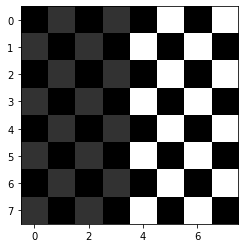

In [410]:
plt.imshow(-ans.reshape((8,8)), 'gray')
#plt.savefig('reconts.jpg')